In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
ndata = pd.read_csv("NextData.csv")

In [4]:
ndata.head()

,Advertiser,Advertiser ID,Advertiser Status,Advertiser Integration Code,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
0,Next_UK_Zenith,378754,Active,NaN,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,378754,Active,NaN,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,378754,Active,NaN,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [14]:
ndata["CTR"] = ndata["Clicks"] / ndata["Impressions"]
ndata["Viewability"] = ndata["Active View: Viewable Impressions"] / ndata["Active View: Measurable Impressions"]

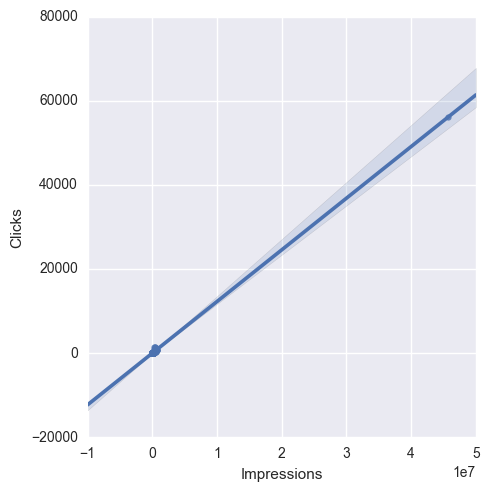

In [5]:
testplot = sns.lmplot(data=ndata, x="Impressions", y="Clicks")

In [6]:
testplot.savefig("testplot.pdf")

In [12]:
import statsmodels.api as sm

In [25]:
model = sm.OLS(ndata.CTR.head(50), ndata["Revenue (Adv Currency)"].head(50))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     24.55
Date:                Tue, 14 Feb 2017   Prob (F-statistic):           9.03e-06
Time:                        00:36:06   Log-Likelihood:                 270.50
No. Observations:                  50   AIC:                            -539.0
Df Residuals:                      49   BIC:                            -537.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Revenue (Adv Currency)   1.3